# Project 4: Communicate Data Findings

São Paulo, 15 June of 2019<br>
Felipe Mahlmeister

## Table of Contents

1. [Summary](#summary)<br>
2. [Data Wrangling](#data_wrangling)<br>
2.1. [Extracting the Data](#extract)<br>
2.2. [Preliminary Wrangling](#preliminary_wrangling)<br>
2.3. [Assess](#assess)<br>
2.4. [Clean](#clean)<br>
4. [Analysis, Modeling, and Validation](#analysis)<br>
5. [Conclusion](#conclusion)<br>

<a id='summary'></a>
## 1. Summary

#### intro
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

These files were downloaded at: http://stat-computing.org/dataexpo/2009/the-data.html

#### Objective

1. We're going to explore which is the airport with the highest traffic
2. How much the traffic increased over the years? Let's check it out with a trending line over the years
3. Which are the most used routes? Let's look at the most used routes with routes drawn on a graph of the United States

<a id='data_wrangling'></a>
## 2. Data Wrangling

In [1]:
# import all default packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import sqlite3
from datetime import datetime
# from urllib.request import urlretrieve
# import glob
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import union_categoricals
import time
import timeit

# import my packages
# packages to get flights data
# from jupyterworkflow.data import get_url
# from jupyterworkflow.data import get_download_and_unzip
# from jupyterworkflow.data import get_flights_data

# packages to wrangle data
# from jupyterworkflow.data import get_column_types

<a id='extract'></a>
### 2.1. Extracting the Data

In [ ]:
# Choose the range of years you want to download
start_year = 1987
last_year = 2008

In order to achieve reproducibility of this project, the below packages download the files from [stat-computing.org](http://stat-computing.org/dataexpo/2009/the-data.html) according to `start_year` and `last_year` automatically, it also unzip these files in source folder.

Package codes in: `jupyterworkflow/data.py`

In [ ]:
url, filepath = get_url(start_year, last_year)
get_flights_data(url, filepath)

<a id='preliminary_wrangling'></a>
### 2.2. Preliminary Wrangling

Before we began to import all csv files to dataframes, first we need to know if it can be imported in a regular workspace.
Let's import the last year file (`2008.csv`) and take a look how much memory it requires:

In [ ]:
df = pd.read_csv('source/2008.csv')

In [ ]:
df.head()

In [ ]:
df.info(memory_usage='deep')

<b>Only this dataframe requires 3.0 GB of memory !</b><br>
Considering that we have 22 csv files with almost the same amount of required memory, it's almost impossible to open them on a regular workspace.

To analysis the whole years' range, we need a better approach than just simply import all these files as we did on the last code line.

We'll take the following strategy (we'll use `2008.csv` as a model):

1. Analyze whether we need all columns or if we could delete some of them
2. Analyze whether pandas imported the correct data formats and correct inaccurate variable formats.
3. Analyze if we could improve the data formats in order to reduce its memory space

<a id='assess'></a>
### 2.3. Assess

At this assess section, we'll only documentate the changes that we'll make on section 2.4.Clean.

#### <div align='center'>Variable descriptions according to [stat-computing.org](http://stat-computing.org/dataexpo/2009/the-data.html)</div>

| &nbsp; | Name | Description |
| ------ | ---- | ----------- |
| 1 | Year | 1987-2008 |
| 2 | Month | 1-12 |
| 3 | DayofMonth | 1-31 |
| 4 | DayOfWeek | 1 (Monday) - 7 (Sunday) |
| 5 | DepTime | actual departure time (local, hhmm) |
| 6 | CRSDepTime | scheduled departure time (local, hhmm) |
| 7 | ArrTime | actual arrival time (local, hhmm) |
| 8 | CRSArrTime | scheduled arrival time (local, hhmm) |
| 9 | UniqueCarrier | unique carrier code |
| 10 | FlightNum | flight number |
| 11 | TailNum | plane tail number |
| 12 | ActualElapsedTime | in minutes |
| 13 | CRSElapsedTime | in minutes |
| 14 | AirTime | in minutes |
| 15 | ArrDelay | arrival delay, in minutes |
| 16 | DepDelay | departure delay, in minutes |
| 17 | Origin | origin IATA airport code |
| 18 | Dest | destination IATA airport code |
| 19 | Distance | in miles |
| 20 | TaxiIn | taxi in time, in minutes |
| 21 | TaxiOut | taxi out time in minutes |
| 22 | Cancelled | was the flight cancelled? |
| 23 | CancellationCode | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
| 24 | Diverted | 1 = yes, 0 = no |
| 25 | CarrierDelay | in minutes |
| 26 | WeatherDelay | in minutes |
| 27 | NASDelay | in minutes |
| 28 | SecurityDelay | in minutes |
| 29 | LateAircraftDelay | in minutes |

#### 2.3.1. Analyze whether we need all columns or if we could delete some of them

After analyzing variable descriptions, all variables are relevant for our analysis and none will not be dropped.

#### 2.3.2. Analyze whether pandas imported the correct data formats and correct inaccurate variable formats.

After analyzing/comparing variable info and variable descriptions, the following variables could change its type, in order to improve their description and decrease memory usage:

1. Data format should be <b>integer</b> instead of <b>float</b>: <br>`DepTime`, `ArrTime`, `ActualElapsedTime`, `CRSElapsedTime`, `AirTime`, `ArrDelay`, `DepDelay `, `TaxiIn`, `TaxiOut`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay `, `LateAircraftDelay`
<br><br>
2. Data format should be <b>category</b> instead of <b>object</b>:<br> `UniqueCarrier`, `TailNum`, `Origin`, `Dest`, `CancellationCode`



The imported raw dataset has:
- float64(14)
- int64(10)
- object(5)<br><br>
After we apply the changes: 
- float64(0)
- int64(24)
- object(0)
- category(5)

#### 2.3.3. Analyze if we could improve the data formats in order to reduce its memory space

- int64(24) --> uint8(0-24) or uint16(0-24)

<a id='clean'></a>
### 2.4. Clean

#### 2.4.1. Correct the variable formats

In [ ]:
conn = sqlite3.connect("source/all_data.db")

c = conn.cursor()

def create_table():
    c.execute('DROP TABLE IF EXISTS raw_data')
    
    sql_query = """CREATE TABLE raw_data (Id INTEGER PRIMARY KEY AUTOINCREMENT,
                                          Year INTEGER,
                                          Month INTEGER, 
                                          DayofMonth INTEGER,
                                          DayOfWeek INTEGER, 
                                          DepTime INTEGER,
                                          CRSDepTime INTEGER, 
                                          ArrTime INTEGER,
                                          CRSArrTime INTEGER, 
                                          UniqueCarrier TEXT,
                                          FlightNum INTEGER, 
                                          TailNum TEXT,
                                          ActualElapsedTime INTEGER, 
                                          CRSElapsedTime INTEGER,
                                          AirTime INTEGER, 
                                          ArrDelay INTEGER,
                                          DepDelay INTEGER, 
                                          Origin TEXT,
                                          Dest TEXT, 
                                          Distance INTEGER, 
                                          TaxiIn INTEGER,
                                          TaxiOut INTEGER, 
                                          Cancelled INTEGER,
                                          CancellationCode TEXT, 
                                          Diverted INTEGER,
                                          CarrierDelay INTEGER, 
                                          WeatherDelay INTEGER,
                                          NASDelay INTEGER, 
                                          SecurityDelay INTEGER,
                                          LateAircraftDelay INTEGER)"""
    c.execute(sql_query)
    
    c.close()
    conn.close()
    
    return print('Table created successfully')

def raw_data_entry(start_year=1987,last_year=1988):
    start_1 = time.time()
    for years in range(0,last_year-start_year+1):
        
        start_2 = time.time()

        for chunk in pd.read_csv('source/{}.csv'.format(start_year+years), chunksize=3000000,
                                 encoding='latin-1'):
            
            float_columns = []
            float_columns = (chunk.select_dtypes(['float'])).columns
            
            int_columns = []
            int_columns = (chunk.select_dtypes(['int'])).columns

            chunk.loc[:,float_columns] = chunk.loc[:,float_columns].fillna(0).astype(int)
            chunk.loc[:,int_columns] = chunk.loc[:,int_columns].fillna(0)
            
            chunk.to_sql(name="raw_data", con=conn, if_exists="append", index=False)
            print(chunk.iloc[0, 0])
            
            del chunk

        end_2 = time.time()
        print('time to include {}.csv:'.format(start_year+years),
              '{:0.0f}'.format(end_2-start_2),'seconds')

    end_1 = time.time()
    print('total time:','{:0.0f}'.format((end_1-start_1)/60),'minutes')
    
    c.close()
    conn.close()
    
    return print('Values inserted successfully')
    
c.close()
conn.close()

In [ ]:
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

create_table()

In [ ]:
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

raw_data_entry(start_year,last_year)

In [ ]:
############## CREATE DATA TABLE ##############

In [ ]:
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """CREATE TABLE IF NOT EXISTS data AS
                                   SELECT Id,
                                          Year, 
                                          Month, 
                                          DayofMonth, 
                                          FlightNum, 
                                          Distance, 
                                          UniqueCarrier, 
                                          TailNum, 
                                          Origin, 
                                          Dest
                                     FROM raw_data;"""

start = time.time()

c.execute(sql_query)

end = time.time()
print('total time:','{:0.0f}'.format(end-start),'seconds')

c.close()
conn.close()

In [ ]:
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """ALTER TABLE data 
                ADD COLUMN Date datetime;"""

c.execute(sql_query)

c.close()
conn.close()

In [ ]:
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """UPDATE data 
                  SET Date = Year || '-' || Month || '-' || DayofMonth"""

c.execute(sql_query)
conn.commit()

c.close()
conn.close()

In [ ]:
############## CREATE DATA_1987 TABLE ##############

In [ ]:
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """CREATE TABLE IF NOT EXISTS data_1987 AS
                                   SELECT Id,
                                          Date,
                                          FlightNum, 
                                          Distance, 
                                          UniqueCarrier, 
                                          TailNum, 
                                          Origin, 
                                          Dest
                                     FROM data
                                    WHERE Date < date('1988-01-01');"""

start = time.time()

c.execute(sql_query)

end = time.time()
print('total time:','{:0.0f}'.format(end-start),'seconds')

c.close()
conn.close()

In [ ]:
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """CREATE TABLE IF NOT EXISTS data_1987_1988 AS
                                   SELECT Id,
                                          Date,
                                          FlightNum, 
                                          Distance, 
                                          UniqueCarrier, 
                                          TailNum, 
                                          Origin, 
                                          Dest
                                     FROM data
                                    WHERE Date < date('1989-01-01');"""

start = time.time()

c.execute(sql_query)

end = time.time()
print('total time:','{:0.0f}'.format(end-start),'seconds')

c.close()
conn.close()

In [ ]:
############## STEP 1 - CREATE DATAFRAME FROM DATA TABLE ##############

In [ ]:
# %%timeit
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """SELECT Id,
                      Date,
                      Origin, 
                      Dest,
                      FlightNum, 
                      Distance, 
                      UniqueCarrier, 
                      TailNum
                 FROM data_1987;"""

df = pd.DataFrame()
chunk = pd.DataFrame()

start = time.time()

for chunk in pd.read_sql_query(sql_query, conn, chunksize=100000):
    
    df = pd.concat([df,chunk], ignore_index=True, sort=False)
    
    df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
        
    df.loc[:,'UniqueCarrier'] = df.loc[:,'UniqueCarrier'].astype('category')
    df.loc[:,'TailNum'] = df.loc[:,'TailNum'].astype('category')
    df.loc[:,'Origin'] = df.loc[:,'Origin'].astype('category')
    df.loc[:,'Dest'] = df.loc[:,'Dest'].astype('category')   
    
    df.loc[:,'FlightNum'] = df.loc[:,'FlightNum'].astype(np.int16)
    df.loc[:,'Distance'] = df.loc[:,'Distance'].astype(np.int16)
    
    print(chunk.iloc[0,1][:4],'-',df.shape[0]/1000000,'M rows')

del chunk
c.close()
conn.close()

end = time.time()

print('import to DataFrame:','{:0.2f}'.format(end-start),'seconds')

In [ ]:
############## STEP 2 - CHANGE CHUNKSIZE TO 500.000 ##############

In [ ]:
# %%timeit
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """SELECT Id,
                      Date,
                      Origin, 
                      Dest,
                      FlightNum, 
                      Distance, 
                      UniqueCarrier, 
                      TailNum
                 FROM data_1987;"""

df = pd.DataFrame()
chunk = pd.DataFrame()

# start = time.time()

for chunk in pd.read_sql_query(sql_query, conn, chunksize=500000):
    
    df = pd.concat([df,chunk], ignore_index=True, sort=False)
    
    df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
        
    df.loc[:,'UniqueCarrier'] = df.loc[:,'UniqueCarrier'].astype('category')
    df.loc[:,'TailNum'] = df.loc[:,'TailNum'].astype('category')
    df.loc[:,'Origin'] = df.loc[:,'Origin'].astype('category')
    df.loc[:,'Dest'] = df.loc[:,'Dest'].astype('category')   
    
    df.loc[:,'FlightNum'] = df.loc[:,'FlightNum'].astype(np.int16)
    df.loc[:,'Distance'] = df.loc[:,'Distance'].astype(np.int16)
    
#     print(chunk.iloc[0,1][:4],'-',df.shape[0]/1000000,'M rows')

del chunk
c.close()
conn.close()

# end = time.time()

# print('import to DataFrame:','{:0.2f}'.format(end-start),'seconds')

In [ ]:
############## STEP 3 - ADD DATE FORMAT ##############

In [ ]:
# %%timeit
conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

sql_query = """SELECT Id,
                      Date,
                      Origin, 
                      Dest,
                      FlightNum, 
                      Distance, 
                      UniqueCarrier, 
                      TailNum
                 FROM data_1987;"""

df = pd.DataFrame()
chunk = pd.DataFrame()

# start = time.time()

for chunk in pd.read_sql_query(sql_query, conn, chunksize=500000):
    
    df = pd.concat([df,chunk], ignore_index=True, sort=False)
    
    df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'], format='%Y-%m-%d')
        
    df.loc[:,'UniqueCarrier'] = df.loc[:,'UniqueCarrier'].astype('category')
    df.loc[:,'TailNum'] = df.loc[:,'TailNum'].astype('category')
    df.loc[:,'Origin'] = df.loc[:,'Origin'].astype('category')
    df.loc[:,'Dest'] = df.loc[:,'Dest'].astype('category')   
    
    df.loc[:,'FlightNum'] = df.loc[:,'FlightNum'].astype(np.int16)
    df.loc[:,'Distance'] = df.loc[:,'Distance'].astype(np.int16)
    
#     print(chunk.iloc[0,1][:4],'-',df.shape[0]/1000000,'M rows')

del chunk
c.close()
conn.close()

# end = time.time()

# print('import to DataFrame:','{:0.2f}'.format(end-start),'seconds')

In [ ]:
############## STEP 4 - ADD PREPROCESSING FUNCTION ##############

In [ ]:
# %%timeit

conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

def chunk_preprocessing(chunk):
    
    chunk.loc[:,'Date'] = pd.to_datetime(chunk.loc[:,'Date'], format='%Y-%m-%d')
        
    chunk.loc[:,'UniqueCarrier'] = chunk.loc[:,'UniqueCarrier'].astype('category')
    chunk.loc[:,'TailNum'] = chunk.loc[:,'TailNum'].astype('category')
    chunk.loc[:,'Origin'] = chunk.loc[:,'Origin'].astype('category')
    chunk.loc[:,'Dest'] = chunk.loc[:,'Dest'].astype('category')   
    
    chunk.loc[:,'FlightNum'] = chunk.loc[:,'FlightNum'].astype(np.int16)
    chunk.loc[:,'Distance'] = chunk.loc[:,'Distance'].astype(np.int16)
    
    return chunk

def query_to_df(query, chunksize=500000):
    
    chunk_list = []
    df = pd.DataFrame()

    for chunk in pd.read_sql_query(sql=query, con=conn, chunksize=chunksize):

        df = pd.concat([df, chunk])
        df = chunk_preprocessing(df)
    
    return df

query = "SELECT * FROM data_1987"
df = query_to_df(query)

In [ ]:
############## STEP 5 - ADD NUMPY TO PREPROCESSING FUNCTION ##############

In [ ]:
%%timeit

conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

def chunk_preprocessing(chunk):
    
    chunk.loc[:,'Date'] = pd.to_datetime(chunk.loc[:,'Date'].values, format='%Y-%m-%d')
        
    chunk.loc[:,'UniqueCarrier'] = chunk.loc[:,'UniqueCarrier'].astype('category')
    chunk.loc[:,'TailNum'] = chunk.loc[:,'TailNum'].astype('category')
    chunk.loc[:,'Origin'] = chunk.loc[:,'Origin'].astype('category')
    chunk.loc[:,'Dest'] = chunk.loc[:,'Dest'].astype('category')   
    
    chunk.loc[:,'FlightNum'] = chunk.loc[:,'FlightNum'].values.astype(np.int16)
    chunk.loc[:,'Distance'] = chunk.loc[:,'Distance'].values.astype(np.int16)
    
    return chunk

def query_to_df(query, chunksize=500000):
    
    chunk_list = []
    df = pd.DataFrame()

    for chunk in pd.read_sql_query(sql=query, con=conn, chunksize=chunksize):

        df = pd.concat([df, chunk])
        df = chunk_preprocessing(df)
    
    return df

query = "SELECT * FROM data_1987"
df = query_to_df(query)

In [ ]:
############## STEP 6 - ADD NUMPY TO PREPROCESSING FUNCTION ##############

In [ ]:
%%timeit

conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

def chunk_preprocessing_numpy(chunk):
    
    chunk.loc[:,'Date'] = pd.to_datetime(chunk.loc[:,'Date'].values, format='%Y-%m-%d')
    chunk.loc[:,'FlightNum'] = chunk.loc[:,'FlightNum'].values.astype(np.int16)
    chunk.loc[:,'Distance'] = chunk.loc[:,'Distance'].values.astype(np.int16)
    
    return chunk

def query_to_df(query, chunksize=500000):
    
    chunk_list = []
    df = pd.DataFrame()

    for chunk in pd.read_sql_query(sql=query, con=conn, chunksize=chunksize):
        
        df = pd.concat([df, chunk_preprocessing_numpy(chunk)])
        df.loc[:,'UniqueCarrier'] = df.loc[:,'UniqueCarrier'].astype('category')
        df.loc[:,'TailNum'] = df.loc[:,'TailNum'].astype('category')
        df.loc[:,'Origin'] = df.loc[:,'Origin'].astype('category')
        df.loc[:,'Dest'] = df.loc[:,'Dest'].astype('category')           

    return df

query = "SELECT * FROM data_1987"
df = query_to_df(query)

In [ ]:
############## STEP 7 - ADD NUMPY TO PREPROCESSING FUNCTION ##############

In [ ]:
# %%timeit

conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

def chunk_preprocessing_numpy(chunk):
    
    chunk.loc[:,'Date'] = pd.to_datetime(chunk.loc[:,'Date'].values, format='%Y-%m-%d')
    chunk.loc[:,'FlightNum'] = chunk.loc[:,'FlightNum'].values.astype(np.int16)
    chunk.loc[:,'Distance'] = chunk.loc[:,'Distance'].values.astype(np.int16)
    
    return chunk

def df_processing_cat(df):
    
    df.loc[:,'UniqueCarrier'] = df.loc[:,'UniqueCarrier'].astype('category')
    df.loc[:,'TailNum'] = df.loc[:,'TailNum'].astype('category')
    df.loc[:,'Origin'] = df.loc[:,'Origin'].astype('category')
    df.loc[:,'Dest'] = df.loc[:,'Dest'].astype('category') 
    
    return df

def query_to_df(query, chunksize=500000):
    
    chunk_list = []
    df = pd.DataFrame()

    for chunk in pd.read_sql_query(sql=query, con=conn, chunksize=chunksize):

        df = pd.concat([df, chunk_preprocessing_numpy(chunk)])
        del chunk
        df = df_processing_cat(df)        

    return df

query = "SELECT * FROM data_1987"
df = query_to_df(query)

In [ ]:
############## STEP 8 -  ##############

In [ ]:
# %%timeit

start = time.time()

conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

def chunk_preprocessing_numpy(chunk):
    
    chunk.loc[:,'Date'] = pd.to_datetime(chunk.loc[:,'Date'].values, format='%Y-%m-%d')
    chunk.loc[:,'FlightNum'] = chunk.loc[:,'FlightNum'].values.astype(np.int16)
    chunk.loc[:,'Distance'] = chunk.loc[:,'Distance'].values.astype(np.int16)
    
    return chunk

def df_processing_cat(df):
    
    df.loc[:,'UniqueCarrier'] = df.loc[:,'UniqueCarrier'].astype('category')
    df.loc[:,'TailNum'] = df.loc[:,'TailNum'].astype('category')
    df.loc[:,'Origin'] = df.loc[:,'Origin'].astype('category')
    df.loc[:,'Dest'] = df.loc[:,'Dest'].astype('category') 
    
    return df

def query_to_df(query, chunksize=600000):
    
    chunk_list = []
    df = pd.DataFrame()

    for chunk in pd.read_sql_query(sql=query, con=conn, chunksize=chunksize):

        df = pd.concat([df, chunk_preprocessing_numpy(chunk)])
        del chunk
        df = df_processing_cat(df)   
        
        print(df.iloc[0,1].year,'-',df.shape[0]/1000000,'M rows')
        
    return df

query = "SELECT * FROM data_1987_1988"
df = query_to_df(query)

end = time.time()

print('import to DataFrame:','{:0.2f}'.format(end-start),'seconds')

In [ ]:
############## STEP 8 -  ##############

In [47]:
# %%timeit

start = time.time()

conn = sqlite3.connect("source/all_data.db")
c = conn.cursor()

def chunk_preprocessing_numpy(chunk):
    try:
        chunk.loc[:,'Date'] = pd.to_datetime(chunk.loc[:,'Date'].values, format='%Y-%m-%d')
    except:
        pass
    try:
        chunk.loc[:,'FlightNum'] = chunk.loc[:,'FlightNum'].values.astype(np.int16)
    except:
        pass
    try:
        chunk.loc[:,'Distance'] = chunk.loc[:,'Distance'].values.astype(np.int16)
    except:
        pass
    return chunk
   
def df_processing_cat(df):  
    try:
        df.loc[:,'UniqueCarrier'] = df.loc[:,'UniqueCarrier'].astype('category')
    except:
        pass
    try:
        df.loc[:,'TailNum'] = df.loc[:,'TailNum'].astype('category')
    except:
        pass
    try:
        df.loc[:,'Origin'] = df.loc[:,'Origin'].astype('category')
    except:
        pass
    try:
        df.loc[:,'Dest'] = df.loc[:,'Dest'].astype('category')
    except:
        pass
    return df


def query_to_df(query, chunksize=600000):
    
    df = pd.DataFrame()
    chunk = pd.DataFrame()

    for chunk in pd.read_sql_query(sql=query, con=conn, chunksize=chunksize):

        df = pd.concat([df, chunk_preprocessing_numpy(chunk)])
        del chunk
        df = df_processing_cat(df)

        print(df.shape[0]/1000000,'M rows')
        
    return df

query = """SELECT Id, 
                  Date,
                  FlightNum,
                  Origin,
                  Dest
             FROM data_1987
            WHERE Origin = 'DEN'"""

df = query_to_df(query)

end = time.time()

print('import to DataFrame:','{:0.2f}'.format(end-start),'seconds')

0.043376 M rows
import to DataFrame: 0.28 seconds


In [48]:
df.head()

,Id,Date,FlightNum,Origin,Dest
0,13848,1987-10-01,18,DEN,STL
1,13849,1987-10-03,18,DEN,STL
2,13850,1987-10-04,18,DEN,STL
3,13851,1987-10-05,18,DEN,STL
4,13852,1987-10-06,18,DEN,STL


In [51]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43376 entries, 0 to 43375
Data columns (total 5 columns):
Id           43376 non-null int64
Date         43376 non-null datetime64[ns]
FlightNum    43376 non-null int16
Origin       43376 non-null category
Dest         43376 non-null category
dtypes: category(2), datetime64[ns](1), int16(1), int64(1)
memory usage: 854.8 KB


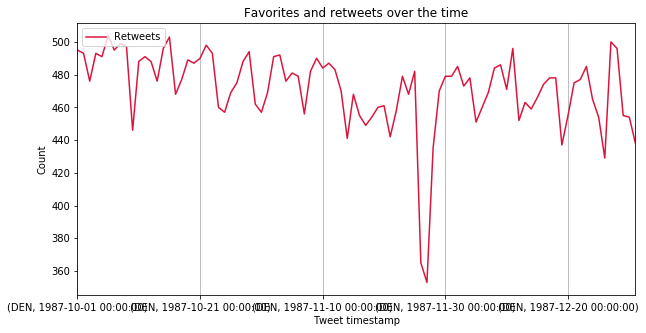

In [52]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

df.groupby(by=['Origin','Date']).count()['Dest'].plot(label='Retweets', color = 'crimson')
# df.favorite_count.plot(label='Favorites', color = 'teal')

# Labels and legend
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.legend(loc='upper left')
ax.grid(axis='x')

# Plot title
plt.title('Favorites and retweets over the time')

plt.show()

In [ ]:
# To avoid working with unnecessary data, we'll choose the followings:
cols = ['Year',
        'Month',
        'DayofMonth',
        'UniqueCarrier',
        'FlightNum',
        'TailNum',
        'Origin',
        'Dest',
        'Distance']

# Init df as DataFrame
df_load = pd.DataFrame({'UniqueCarrier': list(),
                        'TailNum': list(),
                        'Origin': list(),
                        'Dest': list()}, 
                        dtype='category')

df = pd.DataFrame({'UniqueCarrier': list(),
                   'TailNum': list(),
                   'Origin': list(),
                   'Dest': list()}, 
                   dtype='category')

# Import DataFrames (two by two to avoid memory overflow) with optimized column types
i=0

start_1 = time.time()

for years in range(0,last_year-start_year+1):

    df_load = pd.read_csv('source/{}.csv'.format(start_year+years),
                          dtype = {'Year':np.float16,
                                   'Month':np.float16,
                                   'DayofMonth':np.float16,
                                   'UniqueCarrier':'category',
                                   'FlightNum':np.float16,
                                   'TailNum':'category',
                                   'Origin':'category',
                                   'Dest':'category',
                                   'Distance':np.float16},
                          usecols = cols,
                          na_values = ['Year',
                                       'Month',
                                       'DayofMonth',
                                       'UniqueCarrier',
                                       'FlightNum',
                                       'TailNum',
                                       'Origin',
                                       'Dest',
                                       'Distance',
                                        np.nan,
                                        None,
                                       'NaN',
                                       '000000',
                                       'OO'],
                          encoding='latin-1')
    
    uc_UniqueCarrier = union_categoricals([df_load.loc[:,'UniqueCarrier'],df.loc[:,'UniqueCarrier']])
    uc_TailNum = union_categoricals([df_load.loc[:,'TailNum'],df.loc[:,'TailNum']])
    uc_Origin = union_categoricals([df_load.loc[:,'Origin'],df.loc[:,'Origin']])
    uc_Dest = union_categoricals([df_load.loc[:,'Dest'],df.loc[:,'Dest']])
    
    df_load.loc[:,'UniqueCarrier'] = pd.Categorical(df_load.loc[:,'UniqueCarrier'],categories=uc_UniqueCarrier.categories)
    df_load.loc[:,'TailNum'] = pd.Categorical(df_load.loc[:,'TailNum'],categories=uc_TailNum.categories)
    df_load.loc[:,'Origin'] = pd.Categorical(df_load.loc[:,'Origin'],categories=uc_Origin.categories )
    df_load.loc[:,'Dest'] = pd.Categorical(df_load.loc[:,'Dest'],categories=uc_Dest.categories )
    
    df.loc[:,'UniqueCarrier'] = pd.Categorical(df.loc[:,'UniqueCarrier'],categories=uc_UniqueCarrier.categories )
    df.loc[:,'TailNum'] = pd.Categorical(df.loc[:,'TailNum'], categories=uc_TailNum.categories )
    df.loc[:,'Origin'] = pd.Categorical(df.loc[:,'Origin'], categories=uc_Origin.categories )
    df.loc[:,'Dest'] = pd.Categorical(df.loc[:,'Dest'], categories=uc_Dest.categories )
    
    df = pd.concat([df,df_load], ignore_index=True, sort=False)
    
    del df_load
    
    df.loc[:,'Year'].fillna(value=0, inplace=True)
    df.loc[:,'Month'].fillna(value=0, inplace=True)
    df.loc[:,'DayofMonth'].fillna(value=0, inplace=True)
    df.loc[:,'FlightNum'].fillna(value=0, inplace=True)
    df.loc[:,'Distance'].fillna(value=0, inplace=True)
    
    df.loc[:,'Year'] = df.loc[:,'Year'].astype(np.int16)
    df.loc[:,'Month'] = df.loc[:,'Month'].astype(np.int8)
    df.loc[:,'DayofMonth'] = df.loc[:,'DayofMonth'].astype(np.int8)
    df.loc[:,'FlightNum'] = df.loc[:,'FlightNum'].astype(np.int16)
    df.loc[:,'Distance'] = df.loc[:,'Distance'].astype(np.int16)
    
    print(start_year+years)
print('done')
end_1 = time.time()
print(end_1-start_1,'seconds')

In [ ]:
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('Origin'):
    data.plot(x='Date', y='Dest', ax=ax, label=key)

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

df_10000.groupby(by=['Origin','Date']).count()['Dest'].plot(label='Retweets', color = 'crimson')
# df.favorite_count.plot(label='Favorites', color = 'teal')

# Labels and legend
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.legend(loc='upper left')
ax.grid(axis='x')

# Plot title
plt.title('Favorites and retweets over the time')

plt.show()

In [ ]:
df_10000['Origin'].value_counts(ascending=False)[0:10]

In [ ]:
df_10000['Origin'].value_counts(ascending=False)[0:10].index

In [ ]:
df_10000.loc[df_10000['Origin']==x]

In [ ]:
x = df_10000['Origin'].value_counts(ascending=False)[0:10].index
y = df_10000['Origin'].value_counts(ascending=False)[0:10]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total crashes
ax = sb.barplot(x=x, y=y, data=df_10000, color=sb.set_palette("YlOrRd_r", 10))

# # Add a legend and informative axis label
# ax.set(xlim=(0, 150), ylabel="Dog Breed",title='Top 10 Most Rated Dog Breed',
#        xlabel="Count of Dog Breed")

# for ax in plt.gcf().axes:
#     l = ax.get_title()
#     ax.set_title(l, fontsize=20)

In [ ]:
list_of_dataframes = []

# To avoid working with unnecessary data, we'll drop every column unless the followings:
cols_of_interest = ['Year',
                    'Month',
                    'DayofMonth',
                    'DayOfWeek',
                    'UniqueCarrier',
                    'FlightNum',
                    'TailNum',
                    'Origin',
                    'Dest',
                    'Distance']

# List of variables with object type
list_of_obj = ['UniqueCarrier',
               'TailNum',
               'Origin',
               'Dest']

# List of variables with int type
list_of_int = ['Year',
               'Month',
               'DayofMonth',
               'DayOfWeek',
               'FlightNum',
               'Distance']

missing_values = ["n/a", "na", "--",'na','NA']

# Init df as DataFrame
df = pd.DataFrame()
df_total = pd.DataFrame()

# Get optimized column types of the DataFrame as dictionary
column_types = get_column_types(df, cols_of_interest)

for years in range(0,len(year_list)):
    print(year_list[years])
    print(years)

    # Import DataFrames (two by two to avoid memory overflow) with optimized column types
    df_first = pd.read_csv('source/{}.csv'.format(year_list[years][0]), nrows=1000,
                           usecols = cols_of_interest, dtype=column_types,
                           encoding='latin-1', na_values = missing_values)
    
    df_last = pd.read_csv('source/{}.csv'.format(year_list[years][1]), nrows=1000,
                           usecols = cols_of_interest, dtype=column_types,
                          encoding='latin-1', na_values = missing_values)
    
    df = pd.concat([df_first,df_last], ignore_index=True)
    print(df[list_of_int].info())
    
    df[list_of_int].fillna(-1, inplace=True)
    df[list_of_int].astype(int, inplace=True)
    df[list_of_int].astype(str, inplace=True)
    df[list_of_int].replace('-1', np.nan, inplace=True)
    
    #df.loc[:,list_of_obj] = df.loc[:,list_of_obj].astype('category')
    
    #df.select_dtypes(include=['int']).fillna(value=0,inplace=True)
    #df.loc[:,'UniqueCarrier'].cat.add_categories(0).fillna(value=0,inplace=True)
    #df.loc[:,'TailNum'].cat.add_categories(0).fillna(value=0,inplace=True)
    #df.loc[:,'Origin'].cat.add_categories(0).fillna(value=0,inplace=True)
    #df.loc[:,'Dest'].cat.add_categories(0).fillna(value=0,inplace=True)
    
    # Concatenate both DataFrames
    list_of_dataframes.append(df)
    
    # Delete temporary DataFrames to free memory
    del df_first, df_last
    
    list_of_dataframes[years].loc[:,list_of_obj] = list_of_dataframes[years].loc[:,list_of_obj].astype('category')

df_total = pd.concat(list_of_dataframes, axis = 0, ignore_index=True)

del list_of_dataframes

df_total.loc[:,list_of_obj] = df_total.loc[:,list_of_obj].astype('category')

In [ ]:
# To avoid working with unnecessary data, we'll drop every column unless the followings:
cols_of_interest = ['Year',
                    'Month',
                    'DayofMonth',
                    'DayOfWeek',
                    'UniqueCarrier',
                    'FlightNum',
                    'TailNum',
                    'Origin',
                    'Dest',
                    'Distance']

# List of variables with object type
list_of_obj = ['UniqueCarrier',
               'TailNum',
               'Origin',
               'Dest']

# Init df as DataFrame
df = pd.DataFrame()

# Get optimized column types of the DataFrame as dictionary
column_types = get_column_types(df, cols_of_interest)

if (last_year-start_year)%2==0:
    print('par')
    print('')
    for year in range(start_year,last_year+1,2):
        print('first year',year-1)
        print('second year',year)
        print('')
        
        # Import DataFrames (two by two to avoid memory overflow) with optimized column types
        df_first = pd.read_csv('source/{}.csv'.format(year-1), usecols = cols_of_interest, dtype=column_types, nrows=20,encoding='latin-1')
        df_last = pd.read_csv('source/{}.csv'.format(year), usecols = cols_of_interest, dtype=column_types, nrows=20,encoding='latin-1')
        
    # Concatenate both DataFrames
    df = pd.concat([df_first,df_last], axis=0)

    # Delete temporary DataFrames to free memory
    del df_first, df_last

    # When concatenating two DataFrames where one has a categorical column
    # that the other is missing, the result contains the categorical column 
    # as a 'object' (losing the "real" dtype).
    # These situation is documentated as a bug (https://github.com/pandas-dev/pandas/issues/25412).
    # To get around this situation we need to transform its datatypes two times (before and after concat)

    df.loc[:,list_of_obj] = df.loc[:,list_of_obj].astype('category')
else:
    print('impar')
    print('')
    for year in range(start_year+1,last_year+1,2):
        print('first year',year-1)
        print('second year',year)
        print('')


In [ ]:
# To avoid working with unnecessary data, we'll drop every column unless the followings:
cols_of_interest = ['Year',
                    'Month',
                    'DayofMonth',
                    'DayOfWeek',
                    'UniqueCarrier',
                    'FlightNum',
                    'TailNum',
                    'Origin',
                    'Dest',
                    'Distance']

# List of variables with object type
list_of_obj = ['UniqueCarrier',
               'TailNum',
               'Origin',
               'Dest']

# Init df as DataFrame
df = pd.DataFrame()

# Get optimized column types of the DataFrame as dictionary
column_types = get_column_types(df, cols_of_interest)

# Import DataFrames (two by two to avoid memory overflow) with optimized column types
df_2008 = pd.read_csv('source/2008.csv', usecols = cols_of_interest, dtype=column_types)
df_2007 = pd.read_csv('source/2007.csv', usecols = cols_of_interest, dtype=column_types)

# Concatenate both DataFrames
df = df_2007.append(df_2008, ignore_index=True)

# Delete temporary DataFrames to free memory
del df_2007, df_2008

# When concatenating two DataFrames where one has a categorical column
# that the other is missing, the result contains the categorical column 
# as a 'object' (losing the "real" dtype).
# These situation is documentated as a bug (https://github.com/pandas-dev/pandas/issues/25412).
# To get around this situation we need to transform its datatypes two times (before and after concat)

df.loc[:,list_of_obj] = df.loc[:,list_of_obj].astype('category')

Each csv file has aproximatelly 600 MB of file size, and it all together represents 12,0 GB.

    
In a ideal world, a normal workspace could handle all these files at the same time, but for example my computer have only 8 GB of RAM


s we're dealing with large datasets

<a id='clean'></a>
### 2.3. Clean

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!